+ ```資料```
1. **健保資料庫百萬歸⼈檔住院醫療明細檔(DD)、住院醫令檔(DO)** <br>
2. **2007年~2011年**
--------------------------------------------------------
+ ```⽬標對象```
1. **2008年患有缺⾎性⼼臟病(即⼼肌梗塞)者(ICD9-CM 診斷碼 : 410-414)**
2. **年齡65歲或以上**
3. **以當年度(2008年)最早診斷⽇期為 index date**
4. **住院主診斷碼、次診斷碼任⼀個診斷碼符合皆算確診**
--------------------------------------------------------
+ ```⽬標發⽣疾病```
1. **患有缺⾎性⼼臟病後(index date後)，發⽣腦⾎管疾病者，即是中風 (ICD9-CM 診斷碼 : 430-437)**
--------------------------------------------------------
+ ```過去病史，過去⼀年內曾被診斷```
1. **⾼⾎壓 (ICD9-CM 診斷碼 : 401-405)**
2. **⾼⾎糖 (ICD9-CM 診斷碼 : 250)**
3. **⾼⾎脂 (ICD9-CM 診斷碼 : 272)**
4. **慢性腎臟病 (ICD9-CM 診斷碼 : 585)**
5. **慢性阻塞性肺部疾病 (ICD9-CM 診斷碼 : 490-496)**
--------------------------------------------------------
+ ```過去⽤藥史```
1. **ANTIHYPERTENSIVES**
2. **bblocker**
3. **Metformin**
4. **Statin**
--------------------------------------------------------
+ ```產出 Table : 2008年患有缺⾎性⼼臟病的⼈```
1. **平均年齡(mean±SD)**
2. **性別(N, %)**
3. **過去病史(N, %)**
4. **過去⽤藥史(N, %)**
5. **發⽣中⾵((N, %)**
6. **診斷出心臟病與第一次發⽣中⾵的間隔時間，用以計算存活分析**
7. **計算2009、2010、2011這三年因中風而住院的天數計算**
8. **取出倒數第 n 筆資料(取倒數第2筆資料)**
--------------------------------------------------------

+ ```主要步驟```
1. **先從 2008DD 把有罹患缺血性心臟病的病患 ID Set 挑出來**
2. **用 2007DD+DO 找出過去病史與用藥史，用 ID Set 過濾**
3. **找出 2009 2010 2011 腦血管疾病者(中風)，用 ID Set 過濾**

In [1]:
libname NH 'C:\Users\Hong Guo-Peng\Desktop\SAS_demo\SAS_healthy_insurance_demo\SAS_dataset'; run;


5                                                             SAS 系統                         2023年 4月 7日星期五 上午11時52分10秒

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
NOTE: 正在寫入 HTML5(SASPY_INTERNAL) Body (本文) 檔案: _TOMODS1
25         
26         libname NH 'C:\Users\Hong Guo-Peng\Desktop\SAS_demo\SAS_healthy_insurance_demo\SAS_dataset';
NOTE: 已成功指派資料館名稱 NH，如下所述: 
      引擎:        V9 
      實體名稱: C:\Users\Hong Guo-Peng\Desktop\SAS_demo\SAS_healthy_insurance_demo\SAS_dataset
26       !                                                                                              run;
27         
28         
29         ods html5 (id=saspy_internal) close;ods listing;
30         

6                                                             SAS 系統                         2023年 4月 7日星期五 上午11時52分10秒

31         


###  找出 2008年 患有缺血性心臟病的病患

In [2]:
/*2008年患有缺血性心臟病(即心肌梗塞)者(ICD9-CM 診斷碼：410-414 )*/
/*住院主診斷碼、次診斷碼任一個診斷碼符合皆算確診*/
%let condition1 = substr(ICD9CM_CODE , 1 , 3)  in  ('410' '411' ' 412' '413' '414');
%let condition2 = substr(ICD9CM_CODE_1 , 1 , 3)  in  ('410' '411' ' 412' '413' '414');
%let condition3 = substr(ICD9CM_CODE_2 , 1 , 3)  in  ('410' '411' ' 412' '413' '414');
%let condition4 = substr(ICD9CM_CODE_3 , 1 , 3)  in  ('410' '411' ' 412' '413' '414');
%put &condition1. ;
%put &condition2. ;
%put &condition3. ;
%put &condition4. ;

data _null_;
    call symput('today', year(today()));
run;
%put &today. ;

/*年齡65歲或以上*/
%let condition5 = %str(&today. - birth_yy >= 65);
%put &condition5. ;


/*找出 2008年 患有缺血性心臟病的病患*/
%macro find_patient_list; 
    proc sql;
        create table NH.Dd2008_disease as
        select FEE_YM , APPL_TYPE , HOSP_ID  ,  APPL_DATE ,  CASE_TYPE ,  CASE_TYPE ,  ID , ID_BIRTHDAY ,  IN_DATE ,  ICD9CM_CODE , ICD9CM_CODE_1 , ICD9CM_CODE_2 ,  ICD9CM_CODE_3 , ID_SEX ,
               INPUT(substr(ID_BIRTHDAY , 1 , 4) , 4.) as birth_yy , INPUT(substr(ID_BIRTHDAY , 5 , 2) , 2.) as birth_mm
        from NH.Dd2008
    ;
    quit;

    proc sql;
        create table NH.Dd2008_disease as
        select * , &today. - birth_yy as age
        from NH.Dd2008_disease
        ;
    quit;

    proc sql;
    create table NH.Dd2008_target as
        select *
        from NH.Dd2008_disease
        where (&condition1. or &condition2. or &condition3. or &condition4.) and &condition5.
    ;
    quit;

    /*把目標患者ID找出來*/
    proc sql;
        create table NH.Dd2008_target_patient_list as
        select distinct(ID) as ID
        from NH.Dd2008_target
    ;
    quit;

%mend find_patient_list; 
%find_patient_list;


7                                                             SAS 系統                         2023年 4月 7日星期五 上午11時52分10秒

34         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
34       ! ods graphics on / outputfmt=png;
NOTE: 正在寫入 HTML5(SASPY_INTERNAL) Body (本文) 檔案: _TOMODS1
35         
36         /*2008年患有缺血性心臟病(即心肌梗塞)者(ICD9-CM 診斷碼：410-414 )*/
37         /*住院主診斷碼、次診斷碼任一個診斷碼符合皆算確診*/
38         %let condition1 = substr(ICD9CM_CODE , 1 , 3)  in  ('410' '411' ' 412' '413' '414');
39         %let condition2 = substr(ICD9CM_CODE_1 , 1 , 3)  in  ('410' '411' ' 412' '413' '414');
40         %let condition3 = substr(ICD9CM_CODE_2 , 1 , 3)  in  ('410' '411' ' 412' '413' '414');
41         %let condition4 = substr(ICD9CM_CODE_3 , 1 , 3)  in  ('410' '411' ' 412' '413' '414');
42         %put &condition1. ;
substr(ICD9CM_CODE , 1 , 3)  in  ('410' '411' ' 412' '413' '414')
43         %put &condition2. ;
substr(ICD9CM_CODE_1

###  取出倒數第 n 筆資料(這裡是取倒數第2筆資料)

In [3]:
proc sql;
    create table NH.Dd2008_target_sort as
    select ID , IN_DATE 
    from NH.Dd2008_target ;  
    quit; 
    proc sort nodupkey data = NH.Dd2008_target_sort  
    out = NH.Dd2008_target_sort ;   
    by _ALL_;   
run;

data NH.Dd2008_target_sort_count;   
    set NH.Dd2008_target_sort;   
    by ID;   
    first = first.ID; 
    last = last.ID;   
    retain count 0;    
    if first then count = 0;  
    count = count + 1;   
run;

proc sql;
    create table NH.countdown as
    select * , max(count) as freq
    from NH.Dd2008_target_sort_count 
    group by ID;
quit;

data NH.countdown;   
    set NH.countdown;   
    freq = freq - 1;
    if freq = count then output;
run;


9                                                             SAS 系統                         2023年 4月 7日星期五 上午11時52分10秒

99         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
99       ! ods graphics on / outputfmt=png;
NOTE: 正在寫入 HTML5(SASPY_INTERNAL) Body (本文) 檔案: _TOMODS1
100        
101        proc sql;
102            create table NH.Dd2008_target_sort as
103            select ID , IN_DATE
104            from NH.Dd2008_target ;
NOTE: 已建立表格 NH.DD2008_TARGET_SORT，該表格包含 4476 列和 2 欄。

105            quit;
NOTE: 已使用 PROCEDURE SQL (總處理時間):
      實際時間           0.00 秒
      CPU 時間            0.00 秒
      

106            proc sort nodupkey data = NH.Dd2008_target_sort
107            out = NH.Dd2008_target_sort ;
108            by _ALL_;
109        run;

NOTE: 已從資料集 NH.DD2008_TARGET_SORT. 讀取 4476 個觀測值
NOTE: 已刪除 141 個具有重複索引鍵值的觀測值。
NOTE: 資料集 NH.DD2008_TARGET_SORT 有 4335 個觀測值和 2 個變數。
NOTE: 已使用 PROCEDURE SORT (總處理時間):


### 找出2008年患有缺血性心臟病，並在2009年後發生腦血管疾病者

In [4]:
/*找出2008年患有缺血性心臟病，並在2009年後發生腦血管疾病者*/
/*2009年後發生腦血管疾病者 (ICD-9-CM：430-437)*/
%let condition1 = substr(ICD9CM_CODE , 1 , 3)    in  ('430' '431' '432' '433' '434'  '435'  '436'  '437');        
%let condition2 = substr(ICD9CM_CODE_1 , 1 , 3)  in  ('430' '431' '432' '433' '434'  '435'  '436'  '437');
%let condition3 = substr(ICD9CM_CODE_2 , 1 , 3)  in  ('430' '431' '432' '433' '434'  '435'  '436'  '437');
%let condition4 = substr(ICD9CM_CODE_3 , 1 , 3)  in  ('430' '431' '432' '433' '434'  '435'  '436'  '437');
%put &condition1. ;
%put &condition2. ;
%put &condition3. ;
%put &condition4. ;

%macro create_after2008_stroke_dataset; 
    %do i=2009 %to 2011; 
        /*創建NH.Dd_&i. ID 只有保留2008年的目標病患*/
        proc sql;
            create table NH.Dd_&i. as
            select ID , ICD9CM_CODE , ICD9CM_CODE_1 , ICD9CM_CODE_2 , ICD9CM_CODE_3 , IN_DATE , OUT_DATE
            from NH.Dd&i.
            where (ID in (select ID from NH.Dd2008_target_patient_list));
        quit;

        /*構建新的attribute stroke_&i  N_DATE_&i.  OUT_DATE_&i.，只要有發生腦血管疾病者，stroke_&i=1*/
        data NH.Dd_&i.; 
            set NH.Dd_&i.;
            if &condition1. or &condition2. or &condition3. or &condition4.  then stroke_&i. = 1;
            else stroke_&i. = 0;
            IN_DATE_&i. = IN_DATE ; 
            OUT_DATE_&i. = OUT_DATE ; 
        run;

        /*只留下ID 與 stroke_&i.  N_DATE_&i.  OUT_DATE_&i.*/
        data NH.Dd_&i. ;
            set NH.Dd_&i. (keep = ID  stroke_&i.  IN_DATE_&i.  OUT_DATE_&i.);
            if stroke_&i. = 1 then output;
        run;

        /*把重複資料刪除，否則最後left join，資料會越來越大*/
        proc sort nodupkey data = NH.Dd_&i.
            out = NH.Dd_&i. ; 
            by _ALL_; 
        run;  

        /*將NH.Dd_&i. 與 Dd2008_target(主表)合併*/
        /*NH.Dd2008_target_2011為最終結果，包含2009-2011的資料*/
        %if  &i. = 2009 %then %do;
            proc sql;
                create table NH.Dd2008_target_&i. as
                select a.* ,  b.stroke_&i. , b.IN_DATE_&i. , b.OUT_DATE_&i. 
                from NH.Dd2008_target as  a
                left join NH.Dd_&i. as b
                on a.ID = b.ID;
            quit;
        %end; 

        %else %if  &i. ^= 2009 %then %do;
            %let ii = %eval(&i. - 1); 
            proc sql;
                create table NH.Dd2008_target_&i. as
                select a.* ,  b.stroke_&i. , b.IN_DATE_&i. , b.OUT_DATE_&i. 
                from NH.Dd2008_target_&ii. as  a
                left join NH.Dd_&i. as b
                on a.ID = b.ID;
            quit;

        %end;
    %end;

    %do i=2009 %to 2011; 
        data NH.Dd2008_target_2011;
            set NH.Dd2008_target_2011 ;
            if stroke_&i. = . then stroke_&i. = 0;
        run;
    %end;

    /*stroke_freq代表有2009年後發生中風的次數*/
    data NH.Dd2008_target_stroke;
        set NH.Dd2008_target_2011 ;
        stroke_freq = 0;   /*累加初始化*/
    run;
    %do i=2009 %to 2011; 
        data NH.Dd2008_target_stroke;
            set NH.Dd2008_target_stroke ;
            stroke_freq = stroke_freq + stroke_&i.;
        run;
    %end;

    /*stroke_happen代表有無發生過中風*/
    data NH.Dd2008_target_stroke;
        set NH.Dd2008_target_stroke ;
        if stroke_freq >0 then stroke_happen = 1;  
        else stroke_happen = 0;        
    run;
%mend create_after2008_stroke_dataset; 
%create_after2008_stroke_dataset;


%macro after2008_stroke_percentage; 
    /*留下ID stroke這兩個attribute*/
    data NH.Dd2008_target_stroke_happen;
        set NH.Dd2008_target_stroke (keep = ID stroke_happen);
    run;

    /*把重複資料刪除*/
    proc sort nodupkey data = NH.Dd2008_target_stroke_happen 
        out = NH.Dd2008_target_stroke_happen ; 
        by ID  stroke_happen ; 
    run;  

    proc sort nodupkey data = NH.Dd2008_target_stroke_happen 
        out = NH.Dd2008_target_stroke_happen; 
        by ID  ; 
    run; 

    /*計算目標病患人數*/
    proc sql noprint;
        select count(distinct(ID))
        into :patient_total_num
        from NH.Dd2008_target
    ;
    quit;

    /*計算中風比例*/
    proc sql;
        select sum(stroke_happen) / &patient_total_num.  as stroke_percentage 
        from NH.Dd2008_target_stroke_happen
    ; 
    quit;

%mend after2008_stroke_percentage; 
%after2008_stroke_percentage;

stroke_percentage
0.101403


### 存活分析
### 需要找出2008缺血性心臟病患者最早入院日期，與該群人最早因為中風的住院日期

In [5]:
/*存活分析*/
/*需要2008缺血性心臟病患者最早入院日期，與該群人最早中風的住院日期*/
%macro after2008_stroke_interval_surv; 
    %do i=2009 %to 2011; 
        %if  &i. = 2009 %then %do;
            data NH.Dd2008_target_stroke_surv ;
                set NH.Dd2008_target_stroke ;
                if IN_DATE_&i.= '' then IN_DATE_surv_&i. = '19600101' ;
                else IN_DATE_surv_&i. = IN_DATE_&i. ;
            run;
        %end; 

        %else %if  &i. ^= 2009 %then %do;
            data NH.Dd2008_target_stroke_surv ;
                set NH.Dd2008_target_stroke_surv ;
                if IN_DATE_&i.= '' then IN_DATE_surv_&i. = '19600101' ;
                else IN_DATE_surv_&i. = IN_DATE_&i. ;
            run;
        %end;

        data NH.Dd2008_target_stroke_surv ;
            set NH.Dd2008_target_stroke_surv ;
            interval_surv_&i. = input(IN_DATE_surv_&i. , yymmdd8.) - input(IN_DATE , yymmdd8.);
        run;

        /*interval_surv_2009 年為正， surv_first_interval 就是 interval_surv_2009 ，就不需管2010 2011 是正還是負
           簡單來說就是取"第一個"為正的值
           如果要取"最後一個"為正的值，可以從後面遍歷*/	
        /*&i. = 2009 新增surv_first_interval的欄位，並在 interval_surv_&i. >= 0 時賦值給surv_first_interval*/
        %if  &i. = 2009 %then %do;	
            data NH.Dd2008_target_stroke_surv ;
                set NH.Dd2008_target_stroke_surv ;
                if  interval_surv_&i. >= 0  then do;
                    first_in_year = &i. ;
                    surv_first_interval = interval_surv_&i.  ;
                end ;
            run;
        %end; 

        %else %if &i. ^= 2009 %then %do;
            data NH.Dd2008_target_stroke_surv ;
                set NH.Dd2008_target_stroke_surv ;
                if  interval_surv_&i. >= 0 and surv_first_interval = .  then do; 
                    first_in_year = &i. ;
                    surv_first_interval = interval_surv_&i.  ;
                end ;
            run;
        %end; 

    %end; 

    /*若沒有得過中風，那就以2011年末減去最早因心臟病住院日期*/
    data NH.Dd2008_target_stroke_surv ;
        set NH.Dd2008_target_stroke_surv ;
        if  surv_first_interval = . then do; 
            surv_first_interval = input('20111231' , yymmdd8.) - input(IN_DATE , yymmdd8.) ;
        end ;
    run;

    proc sort nodupkey data = NH.Dd2008_target_stroke_surv
        out = NH.Dd2008_target_stroke_surv ; 
        by ID surv_first_interval  ; 
    run; 

    proc sort nodupkey data = NH.Dd2008_target_stroke_surv
        out = NH.Dd2008_target_stroke_surv ; 
        by ID  ; 
    run;

%mend after2008_stroke_interval_surv;
%after2008_stroke_interval_surv;


13                                                            SAS 系統                         2023年 4月 7日星期五 上午11時52分10秒

279        ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
279      ! ods graphics on / outputfmt=png;
NOTE: 正在寫入 HTML5(SASPY_INTERNAL) Body (本文) 檔案: _TOMODS1
280        
281        /*存活分析*/
282        /*需要2008缺血性心臟病患者最早入院日期，與該群人最早中風的住院日期*/
283        %macro after2008_stroke_interval_surv;
284            %do i=2009 %to 2011;
285                %if  &i. = 2009 %then %do;
286                    data NH.Dd2008_target_stroke_surv ;
287                        set NH.Dd2008_target_stroke ;
288                        if IN_DATE_&i.= '' then IN_DATE_surv_&i. = '19600101' ;
289                        else IN_DATE_surv_&i. = IN_DATE_&i. ;
290                    run;
291                %end;
292        
293                %else %if  &i. ^= 2009 %then %do;
294                    data NH.Dd2008_target_stroke_


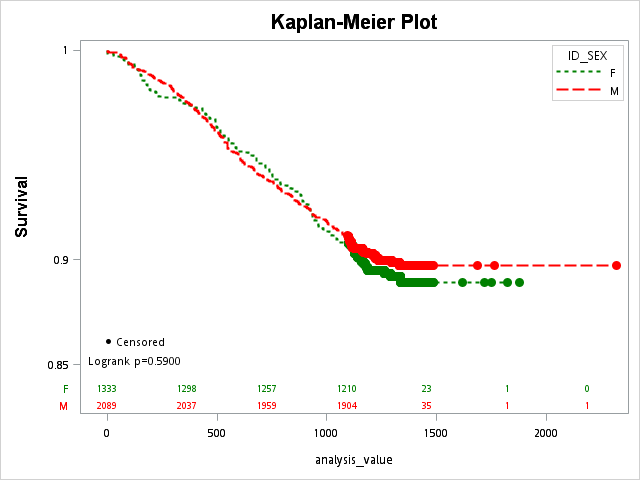

In [6]:
/*存活分析圖：KM PLOT*/
%macro km_plot_stroke_gender;
    data NH.km_plot_stroke_gender;
        set NH.Dd2008_target_stroke_surv (keep= ID_SEX  surv_first_interval  stroke_happen) ;
    run;

    data NH.km_plot_stroke_gender;
        set NH.km_plot_stroke_gender (rename = ( surv_first_interval  = analysis_value  )) ;
        if stroke_happen = 0 then censor = 1;
        else if stroke_happen = 1 then censor = 0;
    run;

    /*下載ProvideSurvivalMacros*/
    data _null_;
    %let url = //support.sas.com/documentation/onlinedoc/stat/ex_code/131;
    infile "http:&url/templft.html" device=url;
    file 'macros.tmp';
    input;
    if index(_infile_, '</pre>') then stop;
    if pre then put _infile_;
    if index(_infile_, '<pre>') then pre + 1;
    run;
    %inc 'macros.tmp' / nosource;

    %ProvideSurvivalMacros
        /*設定字大小、粗體和字型*/
        %let tatters = textattrs=(size=14pt weight=bold family='arial');
        /* 修改title */
        %let TitleText0 = "Kaplan-Meier Plot";
        /*如果分層只有一層的title*/
         %let TitleText1 = &titletext0 " for " STRATUMID  / &tatters;
        /*分層有多層的title*/
         %let TitleText2 = &titletext0  / &tatters;
        /*省略副標題*/
         %let nTitles = 1;
        /*修改圖例的位置*/
         %let LegendOpts = title=GROUPNAME location=inside across=1 autoalign=(TopRight);
       /*改變log rank test名稱，位置，去框*/
          %let InsetOpts = autoalign=(BottomLeft) border=false BackgroundColor=GraphWalls:Color Opaque=true;

        /*修改Y軸*/
        %let yOptions = label="Survival"  labelattrs=(size=12pt weight=bold family='arial')
                linearopts=(viewmin=0.85 viewmax=1 tickvaluelist=(0.85 0.9 1.0));

        /*修改群組的顏色、修改線的樣式*/
        %let GraphOpts = DataContrastColors=(green red blue) DataColors=(green red blue)
                                     ATTRPRIORITY=NONE DataLinePatterns=(ShortDash MediumDash LongDash);
       /*修改線的粗細*/
        %let StepOpts = lineattrs=(thickness=2.5);
       /*修改Censor的樣式*/
        %let Censored = markerattrs=(symbol=circlefilled size=10px);
        %let Censorstr = "(*ESC*){Unicode '25cf'x} Censored" ;
    %CompileSurvivalTemplates

    proc format;
       value $ID_SEX
          "F" = "Female"
          "M" = "Male"
    run;

    ods graphics;
    ods output survivalplot = survivalplot;
    proc lifetest data = NH.km_plot_stroke_gender  notable   plots = survival(test atrisk(maxlen=13)  atrisk=0 to 2500 by 365);
       time analysis_value  * censor(1);  /*event的話要改為(0)*/
       strata ID_SEX;
    run;
    %ProvideSurvivalMacros

    /* 刪除已修改的templates. */
    proc template;
         delete Stat.Lifetest.Graphics.ProductLimitSurvival / store=sasuser.templat;
         delete Stat.Lifetest.Graphics.ProductLimitSurvival2 / store=sasuser.templat;
    run;

%mend km_plot_stroke_gender;
%km_plot_stroke_gender;

### 住院天數
### 2008缺血性心臟病患者，分別在 2009、2010、2011 因為中風而住院天數計算   

In [7]:
/*住院天數*/
/*2008缺血性心臟病患者，分別在 2009、2010、2011 因為中風而住院天數計算*/
%macro after2008_stroke_interval_hosp;
    %do i = 2009 %to 2011; 
        data NH.Dd2008_stroke_interval_hosp_&i.;
            set NH.Dd2008_target_stroke (keep = ID stroke_&i. IN_DATE_&i.  OUT_DATE_&i. stroke_happen);
        run;

        data NH.Dd2008_stroke_interval_hosp_&i.;
            set NH.Dd2008_stroke_interval_hosp_&i.;
            if stroke_&i. = 1 and OUT_DATE_&i. and IN_DATE_&i.  then do ;
                interval_hosp = input(OUT_DATE_&i. , yymmdd8.) - input(IN_DATE_&i. , yymmdd8.);
                output;
            end;
        run;
    %end; 

%mend after2008_stroke_interval_hosp;
%after2008_stroke_interval_hosp; 


17                                                            SAS 系統                         2023年 4月 7日星期五 上午11時52分10秒

806        ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
806      ! ods graphics on / outputfmt=png;
NOTE: 正在寫入 HTML5(SASPY_INTERNAL) Body (本文) 檔案: _TOMODS1
807        
808        /*住院天數*/
809        /*2008缺血性心臟病患者，分別在 2009、2010、2011 因為中風而住院天數計算*/
810        %macro after2008_stroke_interval_hosp;
811            %do i = 2009 %to 2011;
812                data NH.Dd2008_stroke_interval_hosp_&i.;
813                    set NH.Dd2008_target_stroke (keep = ID stroke_&i. IN_DATE_&i.  OUT_DATE_&i. stroke_happen);
814                run;
815        
816                data NH.Dd2008_stroke_interval_hosp_&i.;
817                    set NH.Dd2008_stroke_interval_hosp_&i.;
818                    if stroke_&i. = 1 and OUT_DATE_&i. and IN_DATE_&i.  then do ;
819                        interval_hosp = input(O

### 計算年齡平均 & 標準差 、性別比例

In [8]:
proc sort data = NH.Dd2008_target
    out = NH.Dd2008_avg_age; 
    by ID; 
run;

/*剔除掉重複ID，並取最後一筆*/
data NH.Dd2008_avg_age; 
    set NH.Dd2008_avg_age; 
    by ID; 
    first = first.id;
    last = last.id;
    if last= 1 then output;
run;


/*平均年齡*/
proc sql;  
   select avg(age) as mean_age , std(age) as std_age
   into :patient_mean_age , :patient_std_age 
   from NH.Dd2008_avg_age ; 
quit;
%put &patient_mean_age.; 
%put &patient_std_age.; 

/*計算病人總數*/
proc sql noprint;
    select count(age) as total_patient_num
    into :total_patient_num
    from NH.Dd2008_avg_age
    ; 
quit;
%put &total_patient_num.; 

/*性別比例*/
proc sql;
    select ID_sex , count(ID_sex) / &total_patient_num. as sex_percent
    from NH.Dd2008_avg_age
    group by ID_sex
    ; 
quit;

mean_age,std_age
85.02835,10.66278
ID_SEX,sex_percent
F,0.389538
M,0.610462


### 針對2007年計算過去病史比例 
#### 目標對象很可能同時罹患不同疾病，所以應該是計算罹患某種疾病的目標佔全部目標對象的百分比

目標疾病 :  ```⾼⾎壓  ⾼⾎糖  ⾼⾎脂  慢性腎臟病  慢性阻塞性肺部疾病  ```

In [9]:
/*針對2007年計算過去病史比例*/
/*目標疾病 : ??壓 ??糖 ??脂 慢性腎臟病 慢性阻塞性肺部疾病*/
%macro before_2007_disease_1; 	
	/*先創建macro variable  condition1_1 ~ condition5_4*/
	%do i=1 %to 5;
		/*高血壓 (ICD9: 401-405)*/
		/*住院主診斷碼、次診斷碼任一個診斷碼符合皆算確診*/
		%if &i. = 1 %then %do;
			%let string = ('401' '402' '403' '404' '405');
		%end;

		/*高血糖 (ICD9: 250)*/
		/*住院主診斷碼、次診斷碼任一個診斷碼符合皆算確診*/	
		%else %if &i. = 2 %then %do;
			%let string = ('250');
		%end;

		/*高血脂 (ICD9: 272)*/
		/*住院主診斷碼、次診斷碼任一個診斷碼符合皆算確診*/
		%else %if &i. = 3 %then %do;
			%let string = ('272');
		%end;

		/*慢性腎臟病 (ICD9: 585)*/ 
		/*住院主診斷碼、次診斷碼任一個診斷碼符合皆算確診*/
		%else %if &i. = 4 %then %do;
			%let string = ('585');
		%end;

		/*慢性阻塞性肺部疾病 (ICD9: 490-496)*/
		/*住院主診斷碼、次診斷碼任一個診斷碼符合皆算確診*/
		%else %if &i. = 5 %then %do;
			%let string = ('490' '491' ' 492' '493' '494' '495'  '496');
		%end;
		
		%do j=1 %to 4; 
			%if &j. = 1 %then %do;
				%let condition&i._&j. = substr(ICD9CM_CODE , 1 , 3) in &string.;
			%end;

			%else %if &j. ^= 1 %then %do;
				%let jj = %eval(&j. - 1); 
				%let condition&i._&j. = substr(ICD9CM_CODE_&jj. , 1 , 3) in &string.;
			%end;

			%put &i._&j. &&condition&i._&j.; 
		%end;
	%end;

	%do i=1 %to 5;
		%do j=1 %to 4; 
			%if  &i. = 1 and &j. = 1  %then %do;
				data NH.Dd2007_disease;
					set NH.Dd2007 ;
					if &&condition&i._&j. then condition_&i._&j. = 1;
					else condition_&i._&j. = 0;
				run;
			%end; 

			%else %do;
				data NH.Dd2007_disease ;
					set NH.Dd2007_disease ;
					if &&condition&i._&j. then condition_&i._&j. = 1;
					else condition_&i._&j. = 0;
				run;
			%end; 
		%end;
	%end;
%mend before_2007_disease_1; 
%before_2007_disease_1; 


%macro before_2007_disease_2; 
    /*累加 condition1_1 ~ condition5_4 
       1.高血壓  2.高血糖  3.高血脂  4.慢性腎臟病  5.慢性阻塞性肺部疾病 
       只要有罹患上述任一疾病，condition的值都會大於0 */
    data NH.Dd2007_disease;
        set NH.Dd2007_disease ;
        condition = 0 ;   /*累加初始化*/
    run;
    %do i=1 %to 5;
        %do j=1 %to 4; 
            data NH.Dd2007_disease;
                set NH.Dd2007_disease ;
                condition = condition + condition_&i._&j. ;
            run;
        %end; 
    %end; 

    /*高血壓(disease_1)  高血糖(disease_2) 高血脂(disease_3) 慢性腎臟病(disease_4) 慢性阻塞性肺部疾病(disease_5)*/
    /*上面這些疾病很可能重複得到 所以應該是計算某種疾病佔目標對象的百分比*/
    %do i=1 %to 5;
        %do j=1 %to 4; 
            %if  &j. = 1  %then %do;
                data NH.Dd2007_disease;
                    set NH.Dd2007_disease ;
                    disease_&i. = condition_&i._&j. ;
                run;
            %end; 

            %else %if &j. ^= 1 %then  %do;
                data NH.Dd2007_disease;
                    set NH.Dd2007_disease ;
                    disease_&i. = disease_&i. + condition_&i._&j. ;
                run;
            %end; 
        %end; 

        data NH.Dd2007_disease;
            set NH.Dd2007_disease ;
            if disease_&i. > 0 then disease_&i. = 1 ;
        run;
    %end; 

    /*1.高血壓  2.高血糖  3.高血脂  4.慢性腎臟病  5.慢性阻塞性肺部疾病 
        只要有罹患上述任一疾病，condition的值會大於0， condition 大於0的資料篩選出來 */
    data NH.Dd2007_disease; 
        set NH.Dd2007_disease ;
        if  condition> 0 then output;
    run;

    /*只挑選2008年罹患缺血性心臟病患者*/
    proc sql;
        create table NH.Dd2007_disease as
        select * 
        from NH.Dd2007_disease
        where ID in (select ID from NH.Dd2008_target_patient_list)
        ;
    quit;

    data NH.Dd2007_disease_important; 
        set NH.Dd2007_disease (keep = ID    ICD9CM_CODE    ICD9CM_CODE_1    ICD9CM_CODE_2    ICD9CM_CODE_3    disease_1-disease_5   condition);
    run;
%mend before_2007_disease_2; 
%before_2007_disease_2; 


%macro before_2007_disease_3; 
    %do i=1 %to 5; 
        /*把同一個人罹患同一種疾病的資料去除掉*/
        proc sort nodupkey data = NH.Dd2007_disease
            out = NH.Dd2007_disease_&i.; 
            by ID disease_&i.; 
        run;  

        /*把ID 跟 disease_&i. 留下來*/
        data NH.Dd2007_disease_&i.; 
            set NH.Dd2007_disease_&i.(keep = ID disease_&i.); 
        run; 

        /*把ID重複的刪去*/
        proc sort nodupkey data = NH.Dd2007_disease_&i.
            out = NH.Dd2007_disease_&i.; 
            by ID; 
        run;  

        /*計算NH.Dd2007_disease_&i.有幾筆資料*/
        proc sql noprint;
            select count(ID) as total_disease_row_&i.
            into :  total_disease_row_&i.
            from NH.Dd2007_disease_&i.
            ; 
        quit;
        %put &&total_disease_row_&i.;

        /*disease_&i.為1的總數 / NH.Dd2007_disease_&i.資料數*/
        proc sql noprint;
            select sum(disease_&i.) / &&total_disease_row_&i.  as disease_percentage_&i.
            into :  disease_percentage_&i.
            from NH.Dd2007_disease_&i.
            ; 
        quit;

    %end;
    
    proc sql;
        create table Nh.disease_percentage
        (disease char(20) , disease_percentage num);

        insert  into 
        Nh.disease_percentage
        (disease , disease_percentage)
        values('高血壓' ,             &disease_percentage_1.)
        values('高血糖' ,             &disease_percentage_2.)
        values('高血脂' ,             &disease_percentage_3.)
        values('慢性腎臟病' ,         &disease_percentage_4.)
        values('慢性阻塞性肺部疾病' ,  &disease_percentage_5.);

        select *
        from Nh.disease_percentage
        ;
    quit;
    
%mend before_2007_disease_3; 
%before_2007_disease_3;

disease,disease_percentage
高血壓,0.593717
高血糖,0.33089
高血脂,0.101571
慢性腎臟病,0.017801
慢性阻塞性肺部疾病,0.135079


### 針對2007年計算過去用藥史比例
#### 目標對象很可能同時使用數種藥物，所以應該是計算使用該種用藥的對象佔全部目標對象的百分比

目標用藥 : ```ANTIHYPERTENSIVE  bblocker  Metformin  Statin```

In [10]:
/*針對2007年計算過去用藥史比例*/
/*目標用藥 : ANTIHYPERTENSIVES 、 bblocker 、 Metformin 、 Statin*/
proc import file='C:\Users\Hong Guo-Peng\Desktop\SAS_demo\SAS_healthy_insurance_demo\SAS_dataset\meditation.csv' 
    out = NH.meditation
    dbms = csv replace;
run;

/*先把目標藥物挑出來*/
proc sql ;
    create table NH.drug_code_group as
    select distinct drug_code , drug_group  
    from NH.meditation
    where drug_group in ('ANTIHYPERTENSIVE' , 'bblocker' , 'Metformin' , 'Statin');
quit;

proc sql; 
    create table NH.Do2007_drug as
    select a.FEE_YM , a.APPL_TYPE , a.APPL_DATE , a.CASE_TYPE , a.SEQ_NO , a.HOSP_ID , a.ORDER_CODE , 
               b.ID , c.drug_group
    from NH.Do2007 as a

    /*left join 人次與住院資訊*/
    left join NH.Dd2007 as b
    on a.FEE_YM = b.FEE_YM and a.APPL_TYPE = b.APPL_TYPE and a.APPL_DATE = b.APPL_DATE  and a.CASE_TYPE = b.CASE_TYPE  and a.SEQ_NO = b.SEQ_NO and a.HOSP_ID = b.HOSP_ID 

    /*left join 用藥*/
    left join NH.meditation as c
    on a.ORDER_CODE = c.drug_code

    /*再用where陳述把不相關的藥物剔除*/
    where a.ORDER_CODE in (select drug_code from NH.drug_code_group) and b.ID in (select ID from NH.Dd2008_target_patient_list) 	
    ;
quit;


/*ANTIHYPERTENSIVE(drug_1)  bblocker(drug_2) Metformin(drug_3) Statin(drug_4) */
/*目標對象很可能同時服用drug_1 ~ drug_4 所以應該是計算某種用藥佔目標對象的百分比*/
data NH.Do2007_drug; 
    set NH.Do2007_drug;
    if drug_group = 'ANTIHYPERTENSIVE'  then drug_1 = 1;
    if drug_group = 'bblocker'          then drug_2 = 1;
    if drug_group =  'Metformin'        then drug_3 = 1;
    if drug_group = 'Statin'            then drug_4 = 1;
run;


%macro meditation; 
    %do i=1 %to 4; 
        /*把同一個人用同一種藥的資料去除掉*/
        proc sort nodupkey data = NH.Do2007_drug
            out = NH.Do2007_drug_&i.; 
            by ID drug_&i.; 
        run;  

        /*把ID 跟 drug_&i. 留下來*/
        data NH.Do2007_drug_&i.; 
            set NH.Do2007_drug_&i. (keep = ID drug_&i.); 
        run; 

        /*把ID重複的刪去*/
        proc sort nodupkey data = NH.Do2007_drug_&i.
            out = NH.Do2007_drug_&i.; 
            by ID; 
        run;  

        /*計算NH.Do2007_drug_&i.有幾筆資料*/
        proc sql noprint;
            select count(ID) as total_drug_row_&i.
            into :  total_drug_row_&i.
            from NH.Do2007_drug_&i.
            ; 
        quit;
        %put &&total_drug_row_&i.;

        /*drug_&i.為1的總數 / NH.Do2007_drug_&i.資料數*/
        proc sql noprint;
            select sum(drug_&i.) / &&total_drug_row_&i.  as drug_percentage_&i.
            into :drug_percentage_&i.
            from NH.Do2007_drug_&i.
            ;
        quit;
     
    %end;
    
    proc sql;
        create table Nh.drug_percentage
        (drug char(20) , drug_percentage num);

        insert  into 
        Nh.drug_percentage
        (drug , drug_percentage)
        values('ANTIHYPERTENSIVE' , &drug_percentage_1.)
        values('bblocker' ,         &drug_percentage_2.)
        values('Metformin' ,        &drug_percentage_3.)
        values('Statin' ,           &drug_percentage_4.);

        select *
        from Nh.drug_percentage
        ;
    quit;
%mend meditation; 
%meditation;

drug,drug_percentage
ANTIHYPERTENSIVE,.
bblocker,0.063107
Metformin,0.288835
Statin,0.417476
